<a href="https://colab.research.google.com/github/iam-fern/DPDM/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [274]:
import pandas
import pandas as pd
import os

In [275]:
from google.colab import drive

In [276]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [277]:
base_path = '/content/drive/My Drive/DWDM_material'

In [278]:
os.listdir(base_path)

['test.csv',
 'metadata.xlsx',
 'search_click.csv',
 'w_restaurant.csv',
 'Copy of search_click.csv',
 '03 สังคม.xls',
 '52835793_259306464964511_3851804852342489088_n.png',
 'reduced_marketbasket.csv',
 'Copy of w_restaurant.csv',
 'Preprocessing02.html',
 'teach02.csv',
 'teach.csv',
 'baboon.jpg',
 'data2.csv',
 'data1.gsheet',
 'data3.gsheet',
 'data3.xlsx',
 'data3.csv']

In [283]:
Data1 = os.path.join(base_path, 'data1.xlsx')
Data2 = os.path.join(base_path, 'data2.csv')
Data3 = os.path.join(base_path, 'data3.xlsx')

In [284]:
Data1_df = pd.read_excel(Data1)   
Data1_df.head()   

,จังหวัด,เกษตรกรผู้เลี้ยงสัตว์ทั้งหมด(ครัวเรือน),โคพื้นเมืองเพศผู้(ตัว),โคพื้นเมืองเพศเมีย แรกเกิดถึงโคสาว(ตัว),โคพื้นเมืองเพศเมีย ตั้งท้องแรกขึ้นไป(ตัว),รวมโคพื้นเมือง(ตัว),เกษตรกรผู้เลี้ยงโคพื้นเมือง(ครัวเรือน),โคพันธุ์และโคลูกผสมเพศผู้(ตัว),โคพันธุ์และโคลูกผสมเพศเมีย แรกเกิดถึงโคสาว(ตัว),โคพันธุ์และโคลูกผสมเพศเมีย ตั้งท้องแรกขึ้นไป(ตัว),รวมโคพันธุ์และโคลูกผสม(ตัว),เกษตรกรผู้เลี้ยงโคพันธุ์และโคลูกผสม(ครัวเรือน),โคขุน(ตัว),เกษตรกรผู้เลี้ยงโคขุน(ครัวเรือน),โคเนื้อทั้งหมด(ตัว),เกษตรกรผู้เลี้ยงโคเนื้อทั้งหมด(ครัวเรือน),โคนมเพศผู้(ตัว),โคนมเพศเมียแรกเกิดถึง 1 ปี (ตัว),โคนมเพศเมีย1 ปี ถึงตั้งท้องแรก (ตัว),โคนมเพศเมียกำลังรีดนม(ตัว),โคนมเพศเมียแห้งนม(ตัว),รวมโคนมเพศเมีย(ตัว),รวมโคนมทั้งหมด(ตัว),เกษตรกรผู้เลี้ยงโคนมทั้งหมด(ครัวเรือน),กระบือเพศผู้(ตัว),กระบือเพศเมียแรกเกิดถึงกระบือสาว(ตัว),กระบือเพศเมียตั้งท้องแรกขึ้นไป(ตัว),กระบือเพศเมียทั้งหมด(ตัว),เกษตรกรผู้เลี้ยงกระบือ(ครัวเรือน),สุกรพื้นเมือง(ตัว),เกษตรกรผู้เลี้ยงสุกรพื้นเมือง(ครัวเรือน),สุกรพ่อพันธุ์(ตัว),สุกรแม่พันธุ์(ตัว),เกษตรกรผู้เลี้ยงสุกรพันธุ์(ครัวเรือน),สุกรขุน(ตัว),ลูกสุกรขุน(ตัว),เกษตรกรผู้เลี้ยงสุกรขุน(ครัวเรือน),สุกรทั้งหมด(ตัว),เกษตรกรผู้เลี้ยงสุกรทั้งหมด(ตัว),ไก่พื้นเมือง(ตัว),...,เกษตรกรผู้เลี้ยงแพะเนื้อ(ครัวเรือน),แพะนมเพศผู้(ตัว),แพะนมเพศเมีย(ตัว),เกษตรกรผู้เลี้ยงแพะนม(ครัวเรือน),แพะทั้งหมด(ตัว),เกษตรกรผู้เลี้ยงแพะทั้งหมด(ครัวเรือน),แกะเพศผู้(ตัว),แกะเพศเมีย(ตัว),แกะทั้งหมด(ตัว),เกษตรกรผู้เลี้ยงแกะทั้งหมด(ครัวเรือน),ลา(ตัว),เกษตรกรผู้เลี้ยงลา(ครัวเรือน),ล่อ(ตัว),เกษตรกรผู้เลี้ยงล่อ(ครัวเรือน),ช้าง(ตัว),เกษตรกรผู้เลี้ยงช้าง(ครัวเรือน),ม้า(ตัว),เกษตรกรผู้เลี้ยงม้า(ครัวเรือน),ห่าน(ตัว),เกษตรกรผู้เลี้ยงห่าน(ครัวเรือน),ไก่งวง(ตัว),เกษตรกรผู้เลี้ยงไก่งวง(ครัวเรือน),นกกระทาพันธุ์เนื้อ(ตัว),เกษตรกรผู้เลี้ยงนกกระทาพันธุ์เนื้อ(ครัวเรือน),นกกระทาพันธุ์ไข่(ตัว),เกษตรกรผู้เลี้ยงนกกระทาพันธุ์ไข่(ครัวเรือน),นกกระจอกเทศ(ตัว),เกษตรกรผู้เลี้ยงนกกระจอกเทศ(ครัวเรือน),นกอีมู(ตัว),เกษตรกรผู้เลี้ยงนกอีมู(ครัวเรือน),กวาง(ตัว),เกษตรกรผู้เลี้ยงกวาง(ครัวเรือน),อูฐ(ตัว),เกษตรกรผู้เลี้ยงอูฐ(ครัวเรือน),หมูป่า(ตัว),เกษตรกรผู้เลี้ยงหมูป่า(ครัวเรือน),นก/สัตว์ปีกสวยงาม(ตัว),เกษตรกรผู้เลี้ยงนก/สัตว์ปีกสวยงาม(ครัวเรือน),สัตว์ปีกอื่นๆ(ตัว),เกษตรกรผู้เลี้ยงสัตว์ปีกอื่นๆ(ครัวเรือน)
0,กรุงเทพมหานคร,6427,542,464,494,1500,212,565,655,657,1877,241,174,13,3551,435,7,19,14,38,28,99,106,3,83,99,72,254,35,-,-,15,-,1,-,-,-,15,1,99870,...,338,781,4092,153,15964,397,95,189,284,24,8,2,6,2,7,2,46,11,3274,25,15,5,8,1,10,1,-,-,-,-,-,-,-,-,-,-,1959,164,4669,26
1,นนทบุรี,4103,390,663,443,1496,158,29,15,134,178,15,220,27,1894,199,-,8,5,3,2,18,18,4,51,78,27,156,21,63,1,3,-,1,29,-,1,95,3,103653,...,73,183,853,71,2199,135,79,107,186,13,-,-,-,-,-,-,19,6,43,12,24,4,-,-,80000,1,-,-,-,-,29,1,-,-,20,1,120,2,1072,214
2,ปทุมธานี,4807,638,2742,464,3844,81,267,429,417,1113,79,12,5,4969,160,-,10,34,-,-,44,44,2,44,71,35,150,25,122,8,379,57,14,5718,62,41,6338,55,138851,...,58,36,100,7,2848,61,35,27,62,3,-,-,-,-,-,-,11,3,331,36,20,1,-,-,269200,7,-,-,-,-,-,-,-,-,-,-,540,31,6,1
3,พระนครศรีอยุธยา,20023,1658,1215,766,3639,356,1042,1560,1622,4224,544,277,17,8140,901,10,8,33,-,-,41,51,4,122,123,104,349,60,511,24,11,109,14,20596,502,27,21729,54,950406,...,167,80,432,15,3185,178,66,104,170,13,-,-,-,-,-,-,89,30,15680,93,52,7,823010,34,223800,20,6,2,-,-,1,1,-,-,3,2,3083,1296,2337,1194
4,อ่างทอง,19841,438,898,960,2296,374,1985,4544,4688,11217,1380,1943,94,15456,1791,-,3,2,24,9,38,38,2,117,218,157,492,51,432,22,173,3750,429,35383,19671,689,59409,851,446051,...,49,56,322,11,2768,59,24,41,65,3,-,-,-,-,-,-,30,11,1630,418,49,12,205505,12,1971003,47,-,-,-,-,-,-,-,-,1,1,3479,521,2043,463


In [285]:
Data2_df = pd.read_csv(Data2)   
Data2_df.head()   

,จังหวัด,จำนวน อปท. ที่กรอกข้อมูล,จำนวนสถานธนานุบาลในสังกัด(แห่ง),จำนวนโรงฆ่าสัตว์ของอปท(แห่ง),จำนวนโรงฆ่าสัตว์ของรัฐ(แห่ง),จำนวนโรงฆ่าสัตว์ของเอกชน(แห่ง)
0,กระบี่,62,6,4,0,7
1,กาญจนบุรี,122,6,6,10,48
2,กาฬสินธุ์,151,10,14,15,39
3,กำแพงเพชร,90,5,5,2,29
4,ขอนแก่น,225,223,13,9,22


In [286]:
Data3_df = pd.read_excel(Data3)   
Data3_df.head()   

,จังหวัด,2541,2543,2545,2547,2549,2550,2552,2554,2556,2558
0,กรุงเทพมหานคร,26054,26909,29589,29843,36658,39020,42380,48951.0,49190.8,45571.7
1,สมุทรปราการ,18100,15745,19680,19946,20382,21302,23359,23797.9,29575.3,25457.2
2,นนทบุรี,24211,24566,29119,26658,31152,32743,34626,35119.7,30663.6,36884.0
3,ปทุมธานี,21793,19282,22838,21530,25143,26107,26686,21615.5,33461.3,41056.9
4,พระนครศรีอยุธยา,12918,14904,13319,14980,19676,21676,25820,22301.7,26481.5,28379.4


## 0. Point to data in the table

In [287]:
Data3_df['จังหวัด']

0       กรุงเทพมหานคร
1         สมุทรปราการ
2             นนทบุรี
3            ปทุมธานี
4     พระนครศรีอยุธยา
           ...       
72               ตรัง
73             พัทลุง
74            ปัตตานี
75               ยะลา
76           นราธิวาส
Name: จังหวัด, Length: 77, dtype: object

In [288]:
Data3_df['จังหวัด'][0]          # เรียกใช้เฉพาะบางตัวใน colum

'กรุงเทพมหานคร'

In [289]:
Data3_df.iloc[: , 10:11]          # .iloc จะมองตัวตารางเป็นเมทริกซ์ หน้าคือแถว หลังคือหลัก

,2558
0,45571.7
1,25457.2
2,36884.0
3,41056.9
4,28379.4
...,...
72,23309.1
73,21478.3
74,17513.0
75,15583.8


#### รวมตาราง

In [290]:
Table_merge = Data1_df.merge(Data2_df, how='left', left_on= 'จังหวัด', right_on= 'จังหวัด')     # how คือกำหนดตารางหลัก left_on คือข้อมูลที่ตรงกันสอดคล้องกันนำมารวมกัน
Table_merge

,จังหวัด,เกษตรกรผู้เลี้ยงสัตว์ทั้งหมด(ครัวเรือน),โคพื้นเมืองเพศผู้(ตัว),โคพื้นเมืองเพศเมีย แรกเกิดถึงโคสาว(ตัว),โคพื้นเมืองเพศเมีย ตั้งท้องแรกขึ้นไป(ตัว),รวมโคพื้นเมือง(ตัว),เกษตรกรผู้เลี้ยงโคพื้นเมือง(ครัวเรือน),โคพันธุ์และโคลูกผสมเพศผู้(ตัว),โคพันธุ์และโคลูกผสมเพศเมีย แรกเกิดถึงโคสาว(ตัว),โคพันธุ์และโคลูกผสมเพศเมีย ตั้งท้องแรกขึ้นไป(ตัว),รวมโคพันธุ์และโคลูกผสม(ตัว),เกษตรกรผู้เลี้ยงโคพันธุ์และโคลูกผสม(ครัวเรือน),โคขุน(ตัว),เกษตรกรผู้เลี้ยงโคขุน(ครัวเรือน),โคเนื้อทั้งหมด(ตัว),เกษตรกรผู้เลี้ยงโคเนื้อทั้งหมด(ครัวเรือน),โคนมเพศผู้(ตัว),โคนมเพศเมียแรกเกิดถึง 1 ปี (ตัว),โคนมเพศเมีย1 ปี ถึงตั้งท้องแรก (ตัว),โคนมเพศเมียกำลังรีดนม(ตัว),โคนมเพศเมียแห้งนม(ตัว),รวมโคนมเพศเมีย(ตัว),รวมโคนมทั้งหมด(ตัว),เกษตรกรผู้เลี้ยงโคนมทั้งหมด(ครัวเรือน),กระบือเพศผู้(ตัว),กระบือเพศเมียแรกเกิดถึงกระบือสาว(ตัว),กระบือเพศเมียตั้งท้องแรกขึ้นไป(ตัว),กระบือเพศเมียทั้งหมด(ตัว),เกษตรกรผู้เลี้ยงกระบือ(ครัวเรือน),สุกรพื้นเมือง(ตัว),เกษตรกรผู้เลี้ยงสุกรพื้นเมือง(ครัวเรือน),สุกรพ่อพันธุ์(ตัว),สุกรแม่พันธุ์(ตัว),เกษตรกรผู้เลี้ยงสุกรพันธุ์(ครัวเรือน),สุกรขุน(ตัว),ลูกสุกรขุน(ตัว),เกษตรกรผู้เลี้ยงสุกรขุน(ครัวเรือน),สุกรทั้งหมด(ตัว),เกษตรกรผู้เลี้ยงสุกรทั้งหมด(ตัว),ไก่พื้นเมือง(ตัว),...,เกษตรกรผู้เลี้ยงแพะทั้งหมด(ครัวเรือน),แกะเพศผู้(ตัว),แกะเพศเมีย(ตัว),แกะทั้งหมด(ตัว),เกษตรกรผู้เลี้ยงแกะทั้งหมด(ครัวเรือน),ลา(ตัว),เกษตรกรผู้เลี้ยงลา(ครัวเรือน),ล่อ(ตัว),เกษตรกรผู้เลี้ยงล่อ(ครัวเรือน),ช้าง(ตัว),เกษตรกรผู้เลี้ยงช้าง(ครัวเรือน),ม้า(ตัว),เกษตรกรผู้เลี้ยงม้า(ครัวเรือน),ห่าน(ตัว),เกษตรกรผู้เลี้ยงห่าน(ครัวเรือน),ไก่งวง(ตัว),เกษตรกรผู้เลี้ยงไก่งวง(ครัวเรือน),นกกระทาพันธุ์เนื้อ(ตัว),เกษตรกรผู้เลี้ยงนกกระทาพันธุ์เนื้อ(ครัวเรือน),นกกระทาพันธุ์ไข่(ตัว),เกษตรกรผู้เลี้ยงนกกระทาพันธุ์ไข่(ครัวเรือน),นกกระจอกเทศ(ตัว),เกษตรกรผู้เลี้ยงนกกระจอกเทศ(ครัวเรือน),นกอีมู(ตัว),เกษตรกรผู้เลี้ยงนกอีมู(ครัวเรือน),กวาง(ตัว),เกษตรกรผู้เลี้ยงกวาง(ครัวเรือน),อูฐ(ตัว),เกษตรกรผู้เลี้ยงอูฐ(ครัวเรือน),หมูป่า(ตัว),เกษตรกรผู้เลี้ยงหมูป่า(ครัวเรือน),นก/สัตว์ปีกสวยงาม(ตัว),เกษตรกรผู้เลี้ยงนก/สัตว์ปีกสวยงาม(ครัวเรือน),สัตว์ปีกอื่นๆ(ตัว),เกษตรกรผู้เลี้ยงสัตว์ปีกอื่นๆ(ครัวเรือน),จำนวน อปท. ที่กรอกข้อมูล,จำนวนสถานธนานุบาลในสังกัด(แห่ง),จำนวนโรงฆ่าสัตว์ของอปท(แห่ง),จำนวนโรงฆ่าสัตว์ของรัฐ(แห่ง),จำนวนโรงฆ่าสัตว์ของเอกชน(แห่ง)
0,กรุงเทพมหานคร,6427,542,464,494,1500,212,565,655,657,1877,241,174,13,3551,435,7,19,14,38,28,99,106,3,83,99,72,254,35,-,-,15,-,1,-,-,-,15,1,99870,...,397,95,189,284,24,8,2,6,2,7,2,46,11,3274,25,15,5,8,1,10,1,-,-,-,-,-,-,-,-,-,-,1959,164,4669,26,NaN,NaN,NaN,NaN,NaN
1,นนทบุรี,4103,390,663,443,1496,158,29,15,134,178,15,220,27,1894,199,-,8,5,3,2,18,18,4,51,78,27,156,21,63,1,3,-,1,29,-,1,95,3,103653,...,135,79,107,186,13,-,-,-,-,-,-,19,6,43,12,24,4,-,-,80000,1,-,-,-,-,29,1,-,-,20,1,120,2,1072,214,46.0,15.0,0.0,1.0,1.0
2,ปทุมธานี,4807,638,2742,464,3844,81,267,429,417,1113,79,12,5,4969,160,-,10,34,-,-,44,44,2,44,71,35,150,25,122,8,379,57,14,5718,62,41,6338,55,138851,...,61,35,27,62,3,-,-,-,-,-,-,11,3,331,36,20,1,-,-,269200,7,-,-,-,-,-,-,-,-,-,-,540,31,6,1,65.0,6.0,1.0,0.0,13.0
3,พระนครศรีอยุธยา,20023,1658,1215,766,3639,356,1042,1560,1622,4224,544,277,17,8140,901,10,8,33,-,-,41,51,4,122,123,104,349,60,511,24,11,109,14,20596,502,27,21729,54,950406,...,178,66,104,170,13,-,-,-,-,-,-,89,30,15680,93,52,7,823010,34,223800,20,6,2,-,-,1,1,-,-,3,2,3083,1296,2337,1194,158.0,18.0,6.0,0.0,9.0
4,อ่างทอง,19841,438,898,960,2296,374,1985,4544,4688,11217,1380,1943,94,15456,1791,-,3,2,24,9,38,38,2,117,218,157,492,51,432,22,173,3750,429,35383,19671,689,59409,851,446051,...,59,24,41,65,3,-,-,-,-,-,-,30,11,1630,418,49,12,205505,12,1971003,47,-,-,-,-,-,-,-,-,1,1,3479,521,2043,463,65.0,8.0,4.0,1.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,สงขลา,50156,38485,35129,18538,92152,19297,2291,2686,1381,6358,1767,525,184,99035,20260,-,-,-,-,-,-,-,

In [291]:
Table_merge1 = Table_merge.merge(Data3_df, how='left', left_on= 'จังหวัด', right_on= 'จังหวัด')
Table_merge1.head()

,จังหวัด,เกษตรกรผู้เลี้ยงสัตว์ทั้งหมด(ครัวเรือน),โคพื้นเมืองเพศผู้(ตัว),โคพื้นเมืองเพศเมีย แรกเกิดถึงโคสาว(ตัว),โคพื้นเมืองเพศเมีย ตั้งท้องแรกขึ้นไป(ตัว),รวมโคพื้นเมือง(ตัว),เกษตรกรผู้เลี้ยงโคพื้นเมือง(ครัวเรือน),โคพันธุ์และโคลูกผสมเพศผู้(ตัว),โคพันธุ์และโคลูกผสมเพศเมีย แรกเกิดถึงโคสาว(ตัว),โคพันธุ์และโคลูกผสมเพศเมีย ตั้งท้องแรกขึ้นไป(ตัว),รวมโคพันธุ์และโคลูกผสม(ตัว),เกษตรกรผู้เลี้ยงโคพันธุ์และโคลูกผสม(ครัวเรือน),โคขุน(ตัว),เกษตรกรผู้เลี้ยงโคขุน(ครัวเรือน),โคเนื้อทั้งหมด(ตัว),เกษตรกรผู้เลี้ยงโคเนื้อทั้งหมด(ครัวเรือน),โคนมเพศผู้(ตัว),โคนมเพศเมียแรกเกิดถึง 1 ปี (ตัว),โคนมเพศเมีย1 ปี ถึงตั้งท้องแรก (ตัว),โคนมเพศเมียกำลังรีดนม(ตัว),โคนมเพศเมียแห้งนม(ตัว),รวมโคนมเพศเมีย(ตัว),รวมโคนมทั้งหมด(ตัว),เกษตรกรผู้เลี้ยงโคนมทั้งหมด(ครัวเรือน),กระบือเพศผู้(ตัว),กระบือเพศเมียแรกเกิดถึงกระบือสาว(ตัว),กระบือเพศเมียตั้งท้องแรกขึ้นไป(ตัว),กระบือเพศเมียทั้งหมด(ตัว),เกษตรกรผู้เลี้ยงกระบือ(ครัวเรือน),สุกรพื้นเมือง(ตัว),เกษตรกรผู้เลี้ยงสุกรพื้นเมือง(ครัวเรือน),สุกรพ่อพันธุ์(ตัว),สุกรแม่พันธุ์(ตัว),เกษตรกรผู้เลี้ยงสุกรพันธุ์(ครัวเรือน),สุกรขุน(ตัว),ลูกสุกรขุน(ตัว),เกษตรกรผู้เลี้ยงสุกรขุน(ครัวเรือน),สุกรทั้งหมด(ตัว),เกษตรกรผู้เลี้ยงสุกรทั้งหมด(ตัว),ไก่พื้นเมือง(ตัว),...,เกษตรกรผู้เลี้ยงช้าง(ครัวเรือน),ม้า(ตัว),เกษตรกรผู้เลี้ยงม้า(ครัวเรือน),ห่าน(ตัว),เกษตรกรผู้เลี้ยงห่าน(ครัวเรือน),ไก่งวง(ตัว),เกษตรกรผู้เลี้ยงไก่งวง(ครัวเรือน),นกกระทาพันธุ์เนื้อ(ตัว),เกษตรกรผู้เลี้ยงนกกระทาพันธุ์เนื้อ(ครัวเรือน),นกกระทาพันธุ์ไข่(ตัว),เกษตรกรผู้เลี้ยงนกกระทาพันธุ์ไข่(ครัวเรือน),นกกระจอกเทศ(ตัว),เกษตรกรผู้เลี้ยงนกกระจอกเทศ(ครัวเรือน),นกอีมู(ตัว),เกษตรกรผู้เลี้ยงนกอีมู(ครัวเรือน),กวาง(ตัว),เกษตรกรผู้เลี้ยงกวาง(ครัวเรือน),อูฐ(ตัว),เกษตรกรผู้เลี้ยงอูฐ(ครัวเรือน),หมูป่า(ตัว),เกษตรกรผู้เลี้ยงหมูป่า(ครัวเรือน),นก/สัตว์ปีกสวยงาม(ตัว),เกษตรกรผู้เลี้ยงนก/สัตว์ปีกสวยงาม(ครัวเรือน),สัตว์ปีกอื่นๆ(ตัว),เกษตรกรผู้เลี้ยงสัตว์ปีกอื่นๆ(ครัวเรือน),จำนวน อปท. ที่กรอกข้อมูล,จำนวนสถานธนานุบาลในสังกัด(แห่ง),จำนวนโรงฆ่าสัตว์ของอปท(แห่ง),จำนวนโรงฆ่าสัตว์ของรัฐ(แห่ง),จำนวนโรงฆ่าสัตว์ของเอกชน(แห่ง),2541,2543,2545,2547,2549,2550,2552,2554,2556,2558
0,กรุงเทพมหานคร,6427,542,464,494,1500,212,565,655,657,1877,241,174,13,3551,435,7,19,14,38,28,99,106,3,83,99,72,254,35,-,-,15,-,1,-,-,-,15,1,99870,...,2,46,11,3274,25,15,5,8,1,10,1,-,-,-,-,-,-,-,-,-,-,1959,164,4669,26,NaN,NaN,NaN,NaN,NaN,26054,26909,29589,29843,36658,39020,42380,48951.0,49190.8,45571.7
1,นนทบุรี,4103,390,663,443,1496,158,29,15,134,178,15,220,27,1894,199,-,8,5,3,2,18,18,4,51,78,27,156,21,63,1,3,-,1,29,-,1,95,3,103653,...,-,19,6,43,12,24,4,-,-,80000,1,-,-,-,-,29,1,-,-,20,1,120,2,1072,214,46.0,15.0,0.0,1.0,1.0,24211,24566,29119,26658,31152,32743,34626,35119.7,30663.6,36884.0
2,ปทุมธานี,4807,638,2742,464,3844,81,267,429,417,1113,79,12,5,4969,160,-,10,34,-,-,44,44,2,44,71,35,150,25,122,8,379,57,14,5718,62,41,6338,55,138851,...,-,11,3,331,36,20,1,-,-,269200,7,-,-,-,-,-,-,-,-,-,-,540,31,6,1,65.0,6.0,1.0,0.0,13.0,21793,19282,22838,21530,25143,26107,26686,21615.5,33461.3,41056.9
3,พระนครศรีอยุธยา,20023,1658,1215,766,3639,356,1042,1560,1622,4224,544,277,17,8140,901,10,8,33,-,-,41,51,4,122,123,104,349,60,511,24,11,109,14,20596,502,27,21729,54,950406,...,-,89,30,15680,93,52,7,823010,34,223800,20,6,2,-,-,1,1,-,-,3,2,3083,1296,2337,1194,158.0,18.0,6.0,0.0,9.0,12918,14904,13319,14980,19676,21676,25820,22301.7,26481.5,28379.4
4,อ่างทอง,19841,438,898,960,2296,374,1985,4544,4688,11217,1380,1943,94,15456,1791,-,3,2,24,9,38,38,2,117,218,157,492,51,432,22,173,3750,429,35383,19671,689,59409,851,446051,...,-,30,11,1630,418,49,12,205505,12,1971003,47,-,-,-,-,-,-,-,-,1,1,3479,521,2043,463,65.0,8.0,4.0,1.0,11.0,10878,12544,11653,12855,18300,17704,25506,21139.9,28641.3,23350.6


## 1. Missing Value

In [292]:
Table_merge1.isnull()     # จะเป็นการเช็คว่าเจอ missing value หรือไม่ ถ้าไม่มีก็จะขึ้นว่า false ว่าไม่เจอ

,จังหวัด,เกษตรกรผู้เลี้ยงสัตว์ทั้งหมด(ครัวเรือน),โคพื้นเมืองเพศผู้(ตัว),โคพื้นเมืองเพศเมีย แรกเกิดถึงโคสาว(ตัว),โคพื้นเมืองเพศเมีย ตั้งท้องแรกขึ้นไป(ตัว),รวมโคพื้นเมือง(ตัว),เกษตรกรผู้เลี้ยงโคพื้นเมือง(ครัวเรือน),โคพันธุ์และโคลูกผสมเพศผู้(ตัว),โคพันธุ์และโคลูกผสมเพศเมีย แรกเกิดถึงโคสาว(ตัว),โคพันธุ์และโคลูกผสมเพศเมีย ตั้งท้องแรกขึ้นไป(ตัว),รวมโคพันธุ์และโคลูกผสม(ตัว),เกษตรกรผู้เลี้ยงโคพันธุ์และโคลูกผสม(ครัวเรือน),โคขุน(ตัว),เกษตรกรผู้เลี้ยงโคขุน(ครัวเรือน),โคเนื้อทั้งหมด(ตัว),เกษตรกรผู้เลี้ยงโคเนื้อทั้งหมด(ครัวเรือน),โคนมเพศผู้(ตัว),โคนมเพศเมียแรกเกิดถึง 1 ปี (ตัว),โคนมเพศเมีย1 ปี ถึงตั้งท้องแรก (ตัว),โคนมเพศเมียกำลังรีดนม(ตัว),โคนมเพศเมียแห้งนม(ตัว),รวมโคนมเพศเมีย(ตัว),รวมโคนมทั้งหมด(ตัว),เกษตรกรผู้เลี้ยงโคนมทั้งหมด(ครัวเรือน),กระบือเพศผู้(ตัว),กระบือเพศเมียแรกเกิดถึงกระบือสาว(ตัว),กระบือเพศเมียตั้งท้องแรกขึ้นไป(ตัว),กระบือเพศเมียทั้งหมด(ตัว),เกษตรกรผู้เลี้ยงกระบือ(ครัวเรือน),สุกรพื้นเมือง(ตัว),เกษตรกรผู้เลี้ยงสุกรพื้นเมือง(ครัวเรือน),สุกรพ่อพันธุ์(ตัว),สุกรแม่พันธุ์(ตัว),เกษตรกรผู้เลี้ยงสุกรพันธุ์(ครัวเรือน),สุกรขุน(ตัว),ลูกสุกรขุน(ตัว),เกษตรกรผู้เลี้ยงสุกรขุน(ครัวเรือน),สุกรทั้งหมด(ตัว),เกษตรกรผู้เลี้ยงสุกรทั้งหมด(ตัว),ไก่พื้นเมือง(ตัว),...,เกษตรกรผู้เลี้ยงช้าง(ครัวเรือน),ม้า(ตัว),เกษตรกรผู้เลี้ยงม้า(ครัวเรือน),ห่าน(ตัว),เกษตรกรผู้เลี้ยงห่าน(ครัวเรือน),ไก่งวง(ตัว),เกษตรกรผู้เลี้ยงไก่งวง(ครัวเรือน),นกกระทาพันธุ์เนื้อ(ตัว),เกษตรกรผู้เลี้ยงนกกระทาพันธุ์เนื้อ(ครัวเรือน),นกกระทาพันธุ์ไข่(ตัว),เกษตรกรผู้เลี้ยงนกกระทาพันธุ์ไข่(ครัวเรือน),นกกระจอกเทศ(ตัว),เกษตรกรผู้เลี้ยงนกกระจอกเทศ(ครัวเรือน),นกอีมู(ตัว),เกษตรกรผู้เลี้ยงนกอีมู(ครัวเรือน),กวาง(ตัว),เกษตรกรผู้เลี้ยงกวาง(ครัวเรือน),อูฐ(ตัว),เกษตรกรผู้เลี้ยงอูฐ(ครัวเรือน),หมูป่า(ตัว),เกษตรกรผู้เลี้ยงหมูป่า(ครัวเรือน),นก/สัตว์ปีกสวยงาม(ตัว),เกษตรกรผู้เลี้ยงนก/สัตว์ปีกสวยงาม(ครัวเรือน),สัตว์ปีกอื่นๆ(ตัว),เกษตรกรผู้เลี้ยงสัตว์ปีกอื่นๆ(ครัวเรือน),จำนวน อปท. ที่กรอกข้อมูล,จำนวนสถานธนานุบาลในสังกัด(แห่ง),จำนวนโรงฆ่าสัตว์ของอปท(แห่ง),จำนวนโรงฆ่าสัตว์ของรัฐ(แห่ง),จำนวนโรงฆ่าสัตว์ของเอกชน(แห่ง),2541,2543,2545,2547,2549,2550,2552,2554,2556,2558
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False

In [293]:
Table_merge1.isnull().any()      # สรุปความจริงทั้งหมดในฝั่ง colum

จังหวัด                                      False
เกษตรกรผู้เลี้ยงสัตว์ทั้งหมด(ครัวเรือน)      False
โคพื้นเมืองเพศผู้(ตัว)                       False
โคพื้นเมืองเพศเมีย แรกเกิดถึงโคสาว(ตัว)      False
โคพื้นเมืองเพศเมีย ตั้งท้องแรกขึ้นไป(ตัว)    False
                                             ...  
2550                                         False
2552                                         False
2554                                         False
2556                                         False
2558                                         False
Length: 120, dtype: bool

In [294]:
Table_merge1.isnull().all()

จังหวัด                                      False
เกษตรกรผู้เลี้ยงสัตว์ทั้งหมด(ครัวเรือน)      False
โคพื้นเมืองเพศผู้(ตัว)                       False
โคพื้นเมืองเพศเมีย แรกเกิดถึงโคสาว(ตัว)      False
โคพื้นเมืองเพศเมีย ตั้งท้องแรกขึ้นไป(ตัว)    False
                                             ...  
2550                                         False
2552                                         False
2554                                         False
2556                                         False
2558                                         False
Length: 120, dtype: bool

In [295]:
Table_merge1.isnull().any().any()

True

#### Method 1 : Handling missing values

In [296]:
Table_merge1_nm = Table_merge1.dropna()     # ลบแถวที่มี missing ออก

In [297]:
Table_merge1_nm.isnull().any().any()

False

In [298]:
print(Table_merge1.shape)
print(Table_merge1_nm.shape)

(77, 120)
(76, 120)


In [299]:
Table_merge1.shape[0] - Table_merge1_nm.shape[0]

1

In [300]:
# ตรวจสอบว่าการลบข้อมูล missing ออกจากตาราง Table_merge1 จะทำให้ข้อมูลลดลงกี่ %
(Table_merge1.shape[0] - Table_merge1_nm.shape[0])/(Table_merge1.shape[0])*100

1.2987012987012987

In [301]:
# เลือกดูเฉพาะ จังหวัด, โคพื้นเมืองเพศผู้(ตัว) และรายได้เฉลี่ยปี พ.ศ.2558
Table_merge1.dropna(subset=['จังหวัด', 'โคพื้นเมืองเพศผู้(ตัว)', 2558]).shape

(77, 120)

In [302]:
New_table_merge = Table_merge1.dropna()
New_table_merge.head()

,จังหวัด,เกษตรกรผู้เลี้ยงสัตว์ทั้งหมด(ครัวเรือน),โคพื้นเมืองเพศผู้(ตัว),โคพื้นเมืองเพศเมีย แรกเกิดถึงโคสาว(ตัว),โคพื้นเมืองเพศเมีย ตั้งท้องแรกขึ้นไป(ตัว),รวมโคพื้นเมือง(ตัว),เกษตรกรผู้เลี้ยงโคพื้นเมือง(ครัวเรือน),โคพันธุ์และโคลูกผสมเพศผู้(ตัว),โคพันธุ์และโคลูกผสมเพศเมีย แรกเกิดถึงโคสาว(ตัว),โคพันธุ์และโคลูกผสมเพศเมีย ตั้งท้องแรกขึ้นไป(ตัว),รวมโคพันธุ์และโคลูกผสม(ตัว),เกษตรกรผู้เลี้ยงโคพันธุ์และโคลูกผสม(ครัวเรือน),โคขุน(ตัว),เกษตรกรผู้เลี้ยงโคขุน(ครัวเรือน),โคเนื้อทั้งหมด(ตัว),เกษตรกรผู้เลี้ยงโคเนื้อทั้งหมด(ครัวเรือน),โคนมเพศผู้(ตัว),โคนมเพศเมียแรกเกิดถึง 1 ปี (ตัว),โคนมเพศเมีย1 ปี ถึงตั้งท้องแรก (ตัว),โคนมเพศเมียกำลังรีดนม(ตัว),โคนมเพศเมียแห้งนม(ตัว),รวมโคนมเพศเมีย(ตัว),รวมโคนมทั้งหมด(ตัว),เกษตรกรผู้เลี้ยงโคนมทั้งหมด(ครัวเรือน),กระบือเพศผู้(ตัว),กระบือเพศเมียแรกเกิดถึงกระบือสาว(ตัว),กระบือเพศเมียตั้งท้องแรกขึ้นไป(ตัว),กระบือเพศเมียทั้งหมด(ตัว),เกษตรกรผู้เลี้ยงกระบือ(ครัวเรือน),สุกรพื้นเมือง(ตัว),เกษตรกรผู้เลี้ยงสุกรพื้นเมือง(ครัวเรือน),สุกรพ่อพันธุ์(ตัว),สุกรแม่พันธุ์(ตัว),เกษตรกรผู้เลี้ยงสุกรพันธุ์(ครัวเรือน),สุกรขุน(ตัว),ลูกสุกรขุน(ตัว),เกษตรกรผู้เลี้ยงสุกรขุน(ครัวเรือน),สุกรทั้งหมด(ตัว),เกษตรกรผู้เลี้ยงสุกรทั้งหมด(ตัว),ไก่พื้นเมือง(ตัว),...,เกษตรกรผู้เลี้ยงช้าง(ครัวเรือน),ม้า(ตัว),เกษตรกรผู้เลี้ยงม้า(ครัวเรือน),ห่าน(ตัว),เกษตรกรผู้เลี้ยงห่าน(ครัวเรือน),ไก่งวง(ตัว),เกษตรกรผู้เลี้ยงไก่งวง(ครัวเรือน),นกกระทาพันธุ์เนื้อ(ตัว),เกษตรกรผู้เลี้ยงนกกระทาพันธุ์เนื้อ(ครัวเรือน),นกกระทาพันธุ์ไข่(ตัว),เกษตรกรผู้เลี้ยงนกกระทาพันธุ์ไข่(ครัวเรือน),นกกระจอกเทศ(ตัว),เกษตรกรผู้เลี้ยงนกกระจอกเทศ(ครัวเรือน),นกอีมู(ตัว),เกษตรกรผู้เลี้ยงนกอีมู(ครัวเรือน),กวาง(ตัว),เกษตรกรผู้เลี้ยงกวาง(ครัวเรือน),อูฐ(ตัว),เกษตรกรผู้เลี้ยงอูฐ(ครัวเรือน),หมูป่า(ตัว),เกษตรกรผู้เลี้ยงหมูป่า(ครัวเรือน),นก/สัตว์ปีกสวยงาม(ตัว),เกษตรกรผู้เลี้ยงนก/สัตว์ปีกสวยงาม(ครัวเรือน),สัตว์ปีกอื่นๆ(ตัว),เกษตรกรผู้เลี้ยงสัตว์ปีกอื่นๆ(ครัวเรือน),จำนวน อปท. ที่กรอกข้อมูล,จำนวนสถานธนานุบาลในสังกัด(แห่ง),จำนวนโรงฆ่าสัตว์ของอปท(แห่ง),จำนวนโรงฆ่าสัตว์ของรัฐ(แห่ง),จำนวนโรงฆ่าสัตว์ของเอกชน(แห่ง),2541,2543,2545,2547,2549,2550,2552,2554,2556,2558
1,นนทบุรี,4103,390,663,443,1496,158,29,15,134,178,15,220,27,1894,199,-,8,5,3,2,18,18,4,51,78,27,156,21,63,1,3,-,1,29,-,1,95,3,103653,...,-,19,6,43,12,24,4,-,-,80000,1,-,-,-,-,29,1,-,-,20,1,120,2,1072,214,46.0,15.0,0.0,1.0,1.0,24211,24566,29119,26658,31152,32743,34626,35119.7,30663.6,36884.0
2,ปทุมธานี,4807,638,2742,464,3844,81,267,429,417,1113,79,12,5,4969,160,-,10,34,-,-,44,44,2,44,71,35,150,25,122,8,379,57,14,5718,62,41,6338,55,138851,...,-,11,3,331,36,20,1,-,-,269200,7,-,-,-,-,-,-,-,-,-,-,540,31,6,1,65.0,6.0,1.0,0.0,13.0,21793,19282,22838,21530,25143,26107,26686,21615.5,33461.3,41056.9
3,พระนครศรีอยุธยา,20023,1658,1215,766,3639,356,1042,1560,1622,4224,544,277,17,8140,901,10,8,33,-,-,41,51,4,122,123,104,349,60,511,24,11,109,14,20596,502,27,21729,54,950406,...,-,89,30,15680,93,52,7,823010,34,223800,20,6,2,-,-,1,1,-,-,3,2,3083,1296,2337,1194,158.0,18.0,6.0,0.0,9.0,12918,14904,13319,14980,19676,21676,25820,22301.7,26481.5,28379.4
4,อ่างทอง,19841,438,898,960,2296,374,1985,4544,4688,11217,1380,1943,94,15456,1791,-,3,2,24,9,38,38,2,117,218,157,492,51,432,22,173,3750,429,35383,19671,689,59409,851,446051,...,-,30,11,1630,418,49,12,205505,12,1971003,47,-,-,-,-,-,-,-,-,1,1,3479,521,2043,463,65.0,8.0,4.0,1.0,11.0,10878,12544,11653,12855,18300,17704,25506,21139.9,28641.3,23350.6
5,ลพบุรี,40997,5311,4608,1850,11769,988,6506,11156,13926,31588,1924,563,54,43920,2858,944,9479,10652,21974,5418,47523,48467,1512,492,696,692,1880,124,6624,112,648,20233,682,215523,62578,1373,305606,1798,1178787,...,-,16,5,577,90,84,15,-,-,1481700,70,-,-,-,-,3,1,-,-,154,12,1585,164,624,79,126.0,9.0,8.0,1.0,8.0,10587,10649,11010,15003,19935,16852,22405,17177.7,23425.5,22955.1


In [303]:
New_table_merge1 = New_table_merge[['จังหวัด', 'รวมโคพื้นเมือง(ตัว)', 'สุกรทั้งหมด(ตัว)', 'จำนวนโรงฆ่าสัตว์ของเอกชน(แห่ง)', 2558]]
New_table_merge1

,จังหวัด,รวมโคพื้นเมือง(ตัว),สุกรทั้งหมด(ตัว),จำนวนโรงฆ่าสัตว์ของเอกชน(แห่ง),2558
1,นนทบุรี,1496,95,1.0,36884.0
2,ปทุมธานี,3844,6338,13.0,41056.9
3,พระนครศรีอยุธยา,3639,21729,9.0,28379.4
4,อ่างทอง,2296,59409,11.0,23350.6
5,ลพบุรี,11769,305606,8.0,22955.1
...,...,...,...,...,...
72,สงขลา,92152,107356,13.0,27659.9
73,สตูล,23078,7023,4.0,23208.5
74,ปัตตานี,38647,2371,6.0,17513.0
75,ยะลา,28550,15228,5.0,15583.8


In [309]:
# list ของชื่อในคอลัม 'กวาง(ตัว)' ค่าไหนเท่ากับ 2 ก็จะเป็น true
selected_list = New_table_merge1['รวมโคพื้นเมือง(ตัว)'] == 2296
selected_list

1     False
2     False
3     False
4      True
5     False
      ...  
72    False
73    False
74    False
75    False
76    False
Name: รวมโคพื้นเมือง(ตัว), Length: 76, dtype: bool

In [310]:
New_table_merge1[selected_list].head()

,จังหวัด,รวมโคพื้นเมือง(ตัว),สุกรทั้งหมด(ตัว),จำนวนโรงฆ่าสัตว์ของเอกชน(แห่ง),2558
4,อ่างทอง,2296,59409,11.0,23350.6


In [311]:
from matplotlib import pyplot as plt

{'boxes': [<matplotlib.lines.Line2D at 0x7fb8111c95f8>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb8111d0048>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb8111d0ac8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb8111d0748>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb8111c9908>,
  <matplotlib.lines.Line2D at 0x7fb8111c9c88>]}

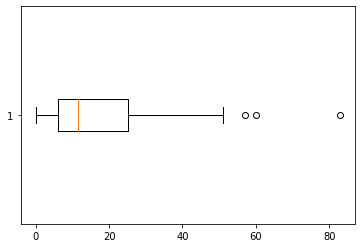

In [312]:
# สร้าง Boxplot ของค่า จำนวนโรงฆ่าสัตว์ของเอกชน(แห่ง) จากตาราง New_table_merge1
ret = plt.boxplot(New_table_merge1['จำนวนโรงฆ่าสัตว์ของเอกชน(แห่ง)'], vert = False)
ret

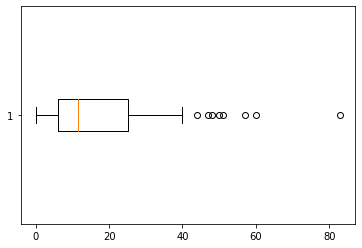

In [218]:
# ret = plt.boxplot(New_table_merge1['จำนวนโรงฆ่าสัตว์ของเอกชน(แห่ง)'], whis=0.8, vert = False)

# fliers คือตัว outliers
# get_xdata() คือคำสั่งปริ้น outliers 
# ใช้เก็บข้อมูลคล้าย list แต่ชี้ด้วยชื่อ

In [313]:
ret['whiskers']

In [314]:
ret['boxes'][0].get_xdata()

array([ 6.  ,  6.  , 25.25, 25.25,  6.  ])

In [315]:
# เพื่อหาขอบเขตที่มากสุดและน้อยสุดของ whiskers
print(ret['whiskers'][0].get_xdata())   # whiskers ด้านซ้าย
print(ret['whiskers'][1].get_xdata())   # whiskers ด้านขวา

[6. 0.]
[25.25 51.  ]


In [317]:
x = New_table_merge1[['รวมโคพื้นเมือง(ตัว)', 2558]]
x.shape

(76, 2)

In [318]:
y = New_table_merge1[['จังหวัด']]
y

,จังหวัด
1,นนทบุรี
2,ปทุมธานี
3,พระนครศรีอยุธยา
4,อ่างทอง
5,ลพบุรี
...,...
72,สงขลา
73,สตูล
74,ปัตตานี
75,ยะลา


#### แบ่ง Data เป็น train กับ test

In [319]:
x_train = x.iloc[:-2,:]
print(x_train.shape)

(74, 2)


In [320]:
x_test = x.iloc[-2:,:]
x_test

,รวมโคพื้นเมือง(ตัว),2558
75,28550,15583.8
76,46660,19889.6


In [321]:
y_train = y.iloc[:-2]
y_train.shape

(74, 1)

In [322]:
y_test = y.iloc[-2:]
y_test

,จังหวัด
75,ยะลา
76,นราธิวาส


## Classification(KNN)

In [333]:
# Import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  cross_val_score

In [376]:
#Define
myKNN = KNeighborsClassifier(n_neighbors=12)

In [377]:
#Train
myKNN.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [378]:
#Test
myKNN.predict(x_test)

array(['ขอนแก่น', 'นครศรีธรรมราช', 'กระบี่', 'ขอนแก่น', 'ฉะเชิงเทรา',
       'กำแพงเพชร', 'ขอนแก่น', 'กำแพงเพชร', 'นครศรีธรรมราช', 'กำแพงเพชร',
       'ฉะเชิงเทรา', 'ขอนแก่น', 'นครศรีธรรมราช', 'นครศรีธรรมราช',
       'กำแพงเพชร', 'กำแพงเพชร', 'กำแพงเพชร', 'ขอนแก่น', 'นครศรีธรรมราช',
       'ฉะเชิงเทรา', 'ขอนแก่น', 'ขอนแก่น', 'ฉะเชิงเทรา', 'กระบี่',
       'กระบี่', 'กระบี่', 'กำแพงเพชร', 'ขอนแก่น', 'นครศรีธรรมราช',
       'กำแพงเพชร', 'กระบี่', 'กำแพงเพชร', 'กำแพงเพชร', 'กระบี่',
       'ขอนแก่น', 'กำแพงเพชร', 'ฉะเชิงเทรา', 'ฉะเชิงเทรา'], dtype=object)

In [379]:
myKNN.predict_proba(x_test)

array([[0.        , 0.        , 0.08333333, ..., 0.        , 0.        ,
        0.08333333],
       [0.        , 0.        , 0.        , ..., 0.08333333, 0.        ,
        0.08333333],
       [0.08333333, 0.        , 0.08333333, ..., 0.        , 0.        ,
        0.08333333],
       ...,
       [0.        , 0.08333333, 0.08333333, ..., 0.        , 0.08333333,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

#### ---> แบ่งข้อมูลเป็น train กับ test แล้วเก็บ test เอาไว้

In [380]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

In [381]:
print(f'{x_train.shape} {x_test.shape}')

(38, 2) (38, 2)


#### ---> ทำ k-cross validation เพื่อเลือก model ที่ดีที่สุด

In [388]:
# model 1
# 1. Define madel
KNN_k3_wD = KNeighborsClassifier(n_neighbors=3, weights='distance')
# 2. Cross validation
cross_val_score(KNN_k3_wD, x_train, y_train, cv=30).mean()

ValueError: ignored